In [12]:
from pandas import read_csv

path='/home/p/s7/mLLabsheet/College/Lab3/diabetes_dataset.csv'
data=read_csv(path)
data.shape


(768, 9)

In [2]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
from sklearn.model_selection import train_test_split

arr=data.values
X=arr[:,0:8]
Y=arr[:,8]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20)
X_test

array([[  4.   ,  90.   ,  88.   , ...,  37.7  ,   0.362,  29.   ],
       [  1.   , 144.   ,  82.   , ...,  41.3  ,   0.607,  28.   ],
       [  1.   ,  79.   ,  80.   , ...,  25.4  ,   0.583,  22.   ],
       ...,
       [  1.   , 139.   ,  46.   , ...,  28.7  ,   0.654,  22.   ],
       [  1.   , 106.   ,  76.   , ...,  37.5  ,   0.197,  26.   ],
       [  0.   , 141.   ,   0.   , ...,  42.4  ,   0.205,  29.   ]])

In [5]:
from sklearn.preprocessing import StandardScaler
import pandas
import numpy

scaler=StandardScaler().fit(X_train) #fit data for standardization
rescaledX=scaler.transform(X_train) #convert the data as per (x-µ)/σ
numpy.set_printoptions(precision=3)
rescaledX[0:2,:]

array([[ 0.642, -0.107,  1.404, -1.279, -0.694, -0.4  , -0.932, -0.257],
       [ 1.23 , -0.263,  0.156, -1.279, -0.694, -1.039,  1.105,  2.137]])

In [6]:
from sklearn import preprocessing
import matplotlib.pyplot as plt

fl_x=data.values.astype(float)

min_max_scaler=preprocessing.MinMaxScaler()

X_scaled=min_max_scaler.fit_transform(fl_x)

df_normalized=pandas.DataFrame(X_scaled)

df_normalized

,0,1,2,3,4,5,6,7,8
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0.0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0.0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0.0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1.0


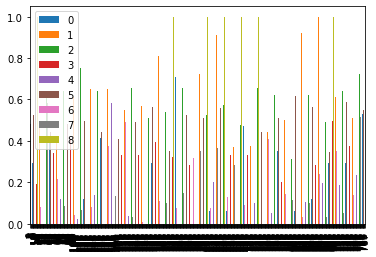

In [7]:
df_normalized.plot(kind='bar')

plt.show()

In [8]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_pred

array([0., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       1.])

In [9]:
from sklearn.metrics import classification_report, confusion_matrix
c=confusion_matrix(y_test, y_pred)
c

array([[79, 17],
       [23, 35]])

In [13]:
from sklearn.model_selection import RepeatedKFold 
kf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=None)
# X is the feature set and y is the target
for train_index, test_index in kf.split(X):
    print("Train:", train_index, "Validation:",test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    

Train: [  0   1   2   3   4   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  33  35  36  37  39
  40  42  44  46  47  48  49  50  51  52  54  57  58  59  60  61  62  63
  65  66  67  68  69  70  71  72  74  75  76  77  79  81  82  84  85  86
  87  88  89  90  91  92  93  94  95  97  98  99 100 101 102 103 104 107
 108 109 110 111 113 114 116 117 118 119 121 122 124 125 126 127 128 129
 131 132 133 134 135 136 137 138 139 141 142 143 144 145 146 147 148 149
 151 152 154 156 157 158 160 161 162 163 166 167 168 169 170 171 172 173
 174 175 176 177 178 180 182 183 184 185 186 188 189 190 191 193 196 197
 198 199 200 201 202 205 206 207 208 210 211 212 213 214 215 216 218 219
 220 221 222 223 224 227 229 234 235 236 238 239 241 242 243 244 245 247
 248 249 250 251 253 254 255 256 257 258 259 260 261 263 264 265 268 270
 271 273 274 275 277 278 279 281 283 284 285 286 287 288 289 291 292 293
 295 300 301 302 306 307 308 309 311 312 313

NameError: name 'y' is not defined

In [14]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None)
for train_index, test_index in skf.split(X,y):
    print("Train:", train_index, "Validation:", val_index) 
    X_train, X_test = X[train_index], X[val_index] 
    y_train, y_test = y[train_index], y[val_index]

NameError: name 'y' is not defined